In [67]:
import pandas as pd
import numpy as np

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [69]:
from datetime import datetime

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
import warnings

warnings.filterwarnings(action='ignore')

In [72]:
df = pd.read_csv('/content/drive/MyDrive/계명대학교_최현성_분석연습/공모주예측/data/visualization_data.csv', index_col=0)

In [73]:
def get_datetime(a, b):
  a = datetime.strptime(a, '%Y'+b+'%m'+b+'%d')
  return a

df['listing_data'] = df['listing_data'].apply(get_datetime, args=('-'))
df['offering_date'] = df['offering_date'].apply(get_datetime, args=('-'))

In [74]:
def to_string(a):
  return str(a)

df['label'] = df['label'].apply(to_string)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 680 entries, 0 to 679
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   company                         680 non-null    object        
 1   listing_data                    680 non-null    datetime64[ns]
 2   offering_price                  680 non-null    int64         
 3   starting_price                  680 non-null    int64         
 4   label                           680 non-null    object        
 5   closing_price                   680 non-null    int64         
 6   stock_market                    680 non-null    object        
 7   company_size                    680 non-null    object        
 8   sales                           680 non-null    int64         
 9   profit_before_tax               680 non-null    int64         
 10  income                          680 non-null    int64         
 11  capita

# 함수

In [76]:
def visual_numerical(dataset, column_name, log=False):
  
  if log == False:
    plt.figure(figsize=(15,7))
    sns.distplot(dataset[column_name][dataset['label']=='0'])
    sns.distplot(dataset[column_name][dataset['label']=='1'])
    plt.legend(['label_0', 'label_1'], loc='best')
    plt.title('histogram_'+column_name)
    plt.ticklabel_format(style='plain')
    plt.show
  
  if log == True:
    copy_data = dataset.copy()
    copy_data[column_name] = np.log(copy_data[column_name])

    plt.figure(figsize=(15,7))
    sns.distplot(copy_data[column_name][dataset['label']=='0'])
    sns.distplot(copy_data[column_name][dataset['label']=='1'])
    plt.legend(['label_0', 'label_1'], loc='best')
    plt.title('histogram_'+column_name)
    plt.ticklabel_format(style='plain')
    plt.show

In [77]:
def visual_categorical(data, column_name, norm=True, just_count=False, reverse=False):
  
  if just_count == False:
    if norm == True:
      if reverse == False:
        df = data.groupby(column_name)['label'].value_counts(normalize=True)
        df = df.mul(100)
        df = df.rename('percent').reset_index()
        df = df.rename(columns = {'level_1': 'label'})

        g = sns.catplot(x=column_name,y='percent',hue='label',kind='bar',data=df)
        g.ax.set_ylim(0,100)
        for p in g.ax.patches:
          txt = str(p.get_height().round(2)) + '%'
          txt_x = p.get_x() + p.get_width() / 2
          txt_y = p.get_height()
          g.ax.text(txt_x,txt_y,txt,ha = 'center',fontsize=10)
        g.fig.set_size_inches(30,10)
        plt.title('barplot_'+column_name)
        plt.show

      if reverse == True:
        df = data.groupby('label')[column_name].value_counts(normalize=True)
        df = df.mul(100)
        df = df.rename('percent').reset_index()

        g = sns.catplot(x='label',y='percent',hue=column_name,kind='bar',data=df)
        g.ax.set_ylim(0,100)
        for p in g.ax.patches:
          txt = str(p.get_height().round(2)) + '%'
          txt_x = p.get_x() + p.get_width() / 2
          txt_y = p.get_height()
          g.ax.text(txt_x,txt_y,txt,ha = 'center',fontsize=10)
        g.fig.set_size_inches(30,10)
        plt.title('barplot_'+column_name)
        plt.show


    if norm == False:
      if reverse == False:
        plt.figure(figsize=(30,10))
        ax = sns.countplot(x=column_name, data=data, hue='label')
        for p in ax.patches:
          height = p.get_height()
          ax.text(p.get_x() + p.get_width() / 2, height + 30, height, ha = 'center', size = 10)
        plt.title('barplot_'+column_name)
        plt.show
      
      if reverse == True:
        plt.figure(figsize=(30,10))
        ax = sns.countplot(x='label', data=data, hue=column_name)
        for p in ax.patches:
          height = p.get_height()
          ax.text(p.get_x() + p.get_width() / 2, height + 30, height, ha = 'center', size = 10)
        plt.title('barplot_'+column_name)
        plt.show

  if just_count == True:
    plt.figure(figsize=(15,8))
    ax = sns.countplot(x=column_name, data=data)
    for p in ax.patches:
      height = p.get_height()
      ax.text(p.get_x() + p.get_width() / 2, height + 30, height, ha = 'center', size = 10)
    plt.title('barplot_'+column_name)
    plt.show

In [135]:
def visual_outlier(data, column_name):
  plt.figure(figsize=(5,8))
  sns.stripplot(y=data[column_name])
  plt.title('Outlier_'+column_name)
  plt.show

In [87]:
def outliers_iqr(data,column_name):
  q1, q3 = np.percentile(data[column_name], [25,75])
  iqr = q3 - q1
  lower_bound = q1 - (iqr * 1.5)
  upper_bound = q3 + (iqr * 1.5)

  index = np.where((data[column_name] > upper_bound) | (data[column_name] < lower_bound))[0]
  
  # outlier = data.iloc[index]

  index_list = []

  for i in range(len(data)):
    if i not in index:
      index_list.append(i)

  remove_outlier = data.loc[index_list]
  remove_outlier.reset_index(drop=True, inplace=True)

  return remove_outlier

# 코드

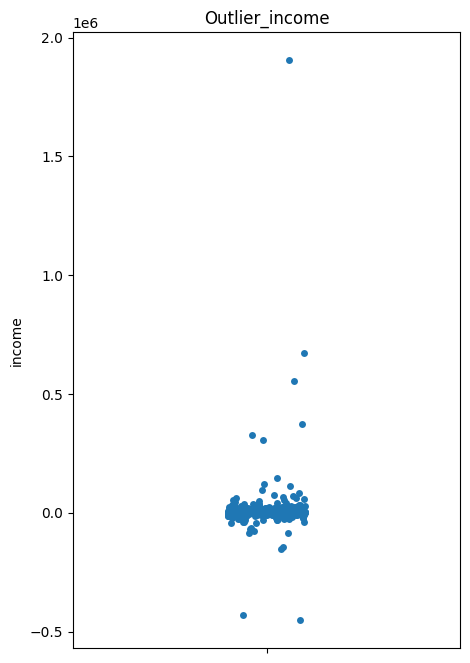

In [136]:
visual_outlier(df, 'income')

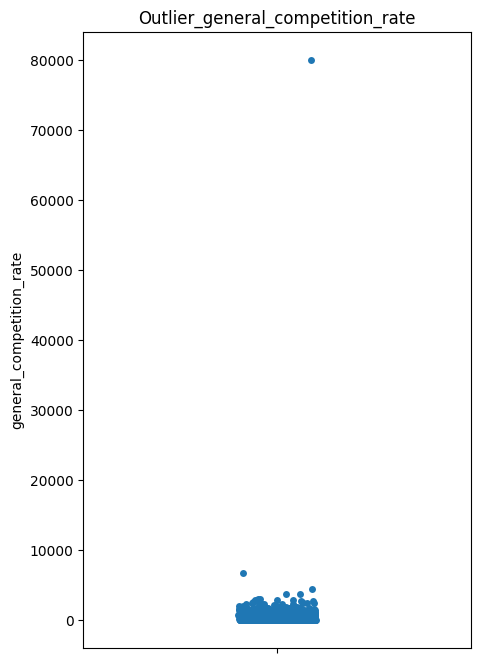

In [137]:
visual_outlier(df, 'general_competition_rate')

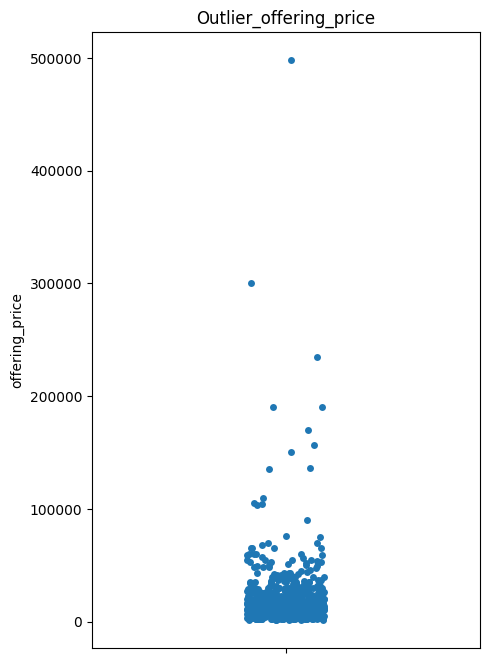

In [138]:
visual_outlier(df, 'offering_price')

<function matplotlib.pyplot.show(close=None, block=None)>

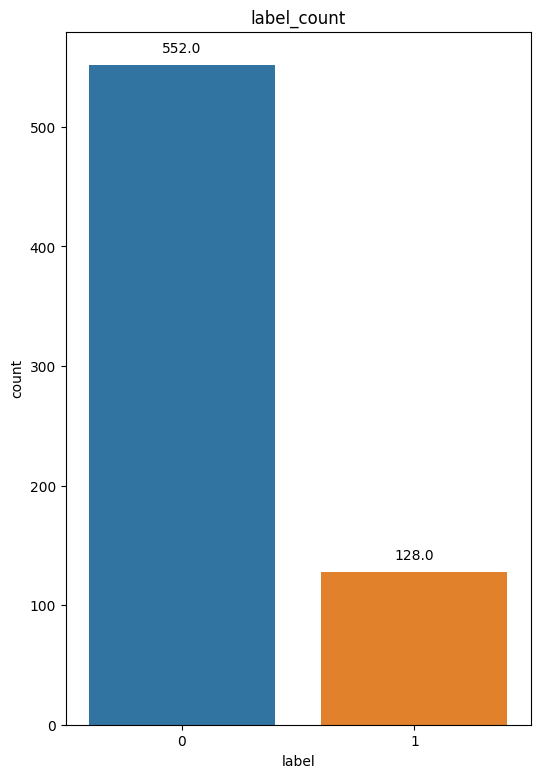

In [78]:
plt.figure(figsize=(6,9))
ax = sns.countplot(x='label', data=df)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2, height + 10, height, ha = 'center', size = 10)
plt.title('label_count')
plt.show

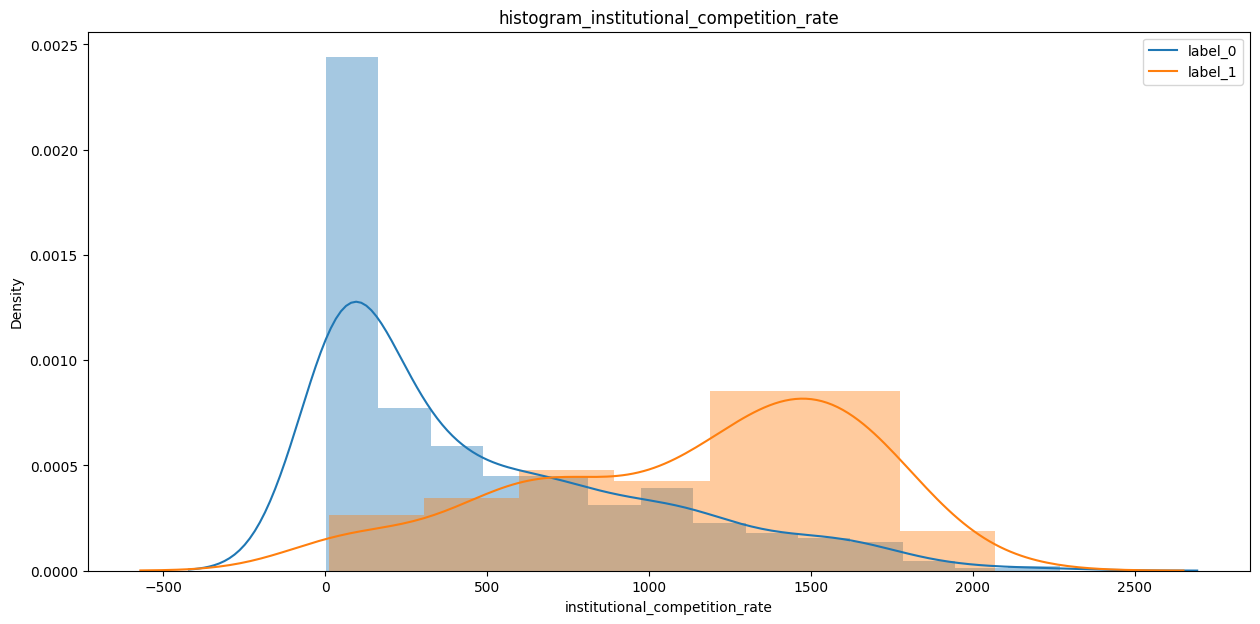

In [79]:
visual_numerical(df, 'institutional_competition_rate', log=False)

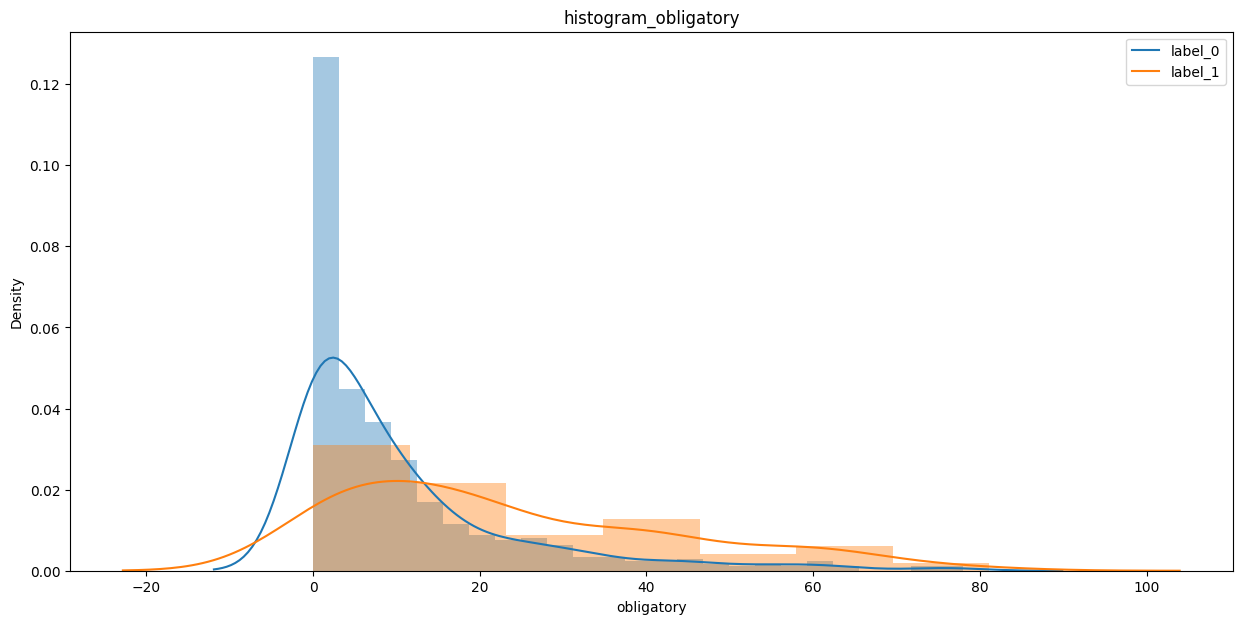

In [80]:
visual_numerical(df, 'obligatory', log=False)

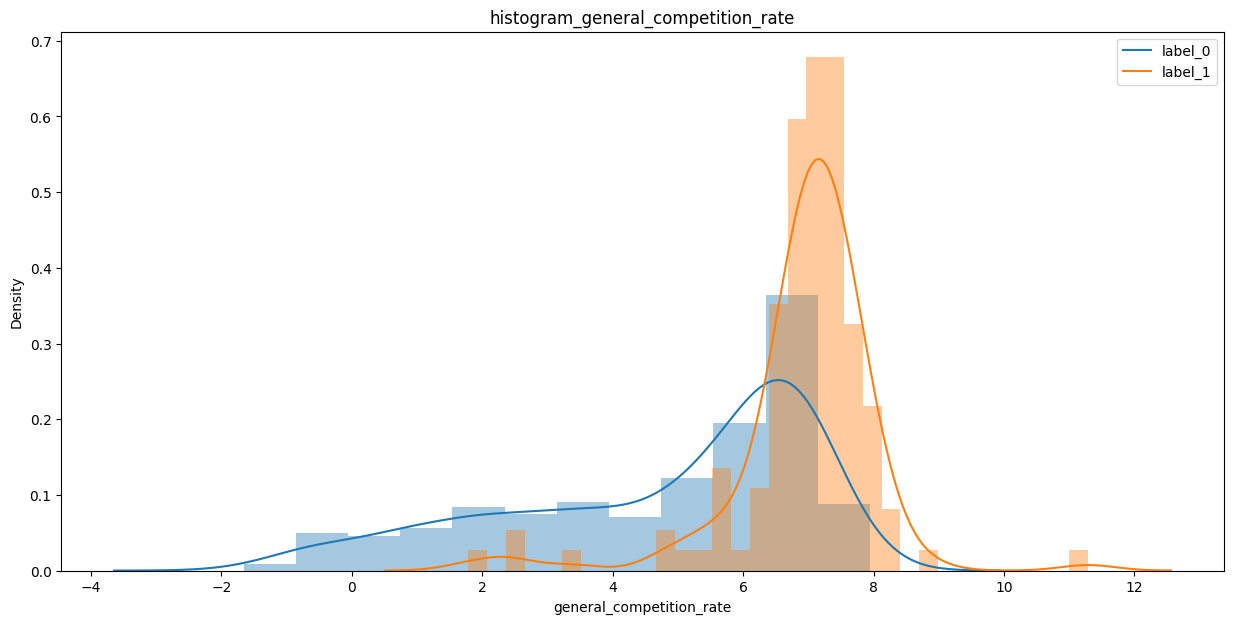

In [85]:
visual_numerical(df, 'general_competition_rate', log=True)

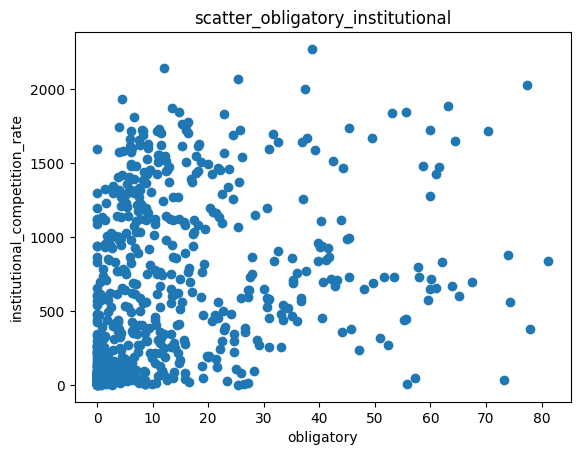

In [139]:
plt.scatter(df['obligatory'].loc[df['institutional_competition_rate'] <= 100000], df['institutional_competition_rate'].loc[df['institutional_competition_rate'] <= 100000])
plt.title('scatter_obligatory_institutional')
plt.xlabel('obligatory')
plt.ylabel('institutional_competition_rate')
plt.show()

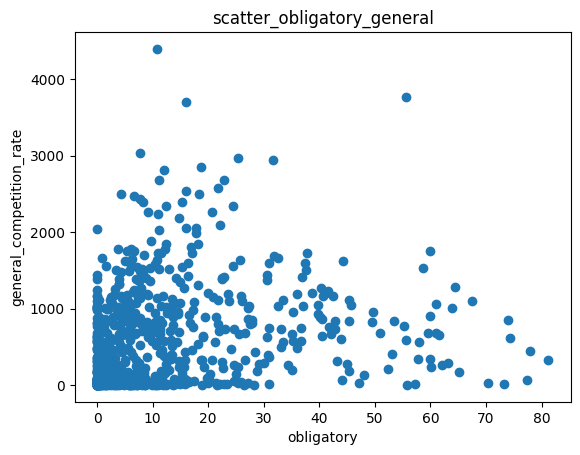

In [140]:
plt.scatter(df['obligatory'].loc[df['general_competition_rate'] <= 5000], df['general_competition_rate'].loc[df['general_competition_rate'] <= 5000])
plt.title('scatter_obligatory_general')
plt.xlabel('obligatory')
plt.ylabel('general_competition_rate')
plt.show()